## Backpropagation multilayered Neural Network

In [1]:
import numpy as np
import pandas as pd
from backpropagation import BackPropagation


### Create training set from diagnosis.xlsx

In [2]:
data = pd.read_excel('diagnosis.xlsx')
data.head()
training_set = []
for index, row in data.iterrows():
    features = [row['Fever'], row['Cough'], row['Headache'], row['Tiredness'], row['Night Sweat']]
    result = [row['Pneumonia'], row['Flu'], row['Cold']]
    training_set.append((features, result))
    
training_set

[([0.0, 0.5, 0.5, 0.0, 0.0], [0.0, 0.0, 1.0]),
 ([1.0, 1.0, 1.0, 1.0, 0.0], [0.0, 1.0, 0.0]),
 ([0.5, 1.0, 0.0, 1.0, 1.0], [1.0, 0.0, 0.0]),
 ([0.0, 0.5, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0]),
 ([1.0, 0.5, 1.0, 0.5, 0.0], [0.0, 1.0, 0.0]),
 ([1.0, 1.0, 0.0, 0.5, 0.5], [1.0, 0.0, 0.0])]

### Initialize and learn multilayered neural network
* training set is given by a list [([i11, i12 ... i1N],[o11 ... o1M]), ... ([ik1, ..., ikN],[ok1, ..., okM])]
* topology [num_of_features, num_of_inner_neurons, num_of_inner_neurons, num_of_results]
* learning rates [for_weights, for_biases, for_slopes]
* number of leraning epochs

In case of learning rates for biases and slopes equal 0 only weights based learning is executed

In [3]:
bpnn = BackPropagation(training_set,[5, 5, 5, 3], [0.3, 0.3, 0.3], 1000)
bpnn.backpropagation()
for row in training_set:
    net_input = row[0]
    bpnn.feed_forward(net_input)
    net_output = bpnn.output_activation.reshape([1,3])
    print("Input: ", net_input, " Output: ", net_output.flatten().tolist())




Input:  [0.0, 0.5, 0.5, 0.0, 0.0]  Output:  [0.0, 0.01, 0.99]
Input:  [1.0, 1.0, 1.0, 1.0, 0.0]  Output:  [0.01, 0.99, 0.01]
Input:  [0.5, 1.0, 0.0, 1.0, 1.0]  Output:  [0.99, 0.01, 0.0]
Input:  [0.0, 0.5, 0.0, 0.0, 0.0]  Output:  [0.0, 0.01, 0.99]
Input:  [1.0, 0.5, 1.0, 0.5, 0.0]  Output:  [0.01, 0.99, 0.01]
Input:  [1.0, 1.0, 0.0, 0.5, 0.5]  Output:  [0.99, 0.01, 0.0]


### Draw the history of learning

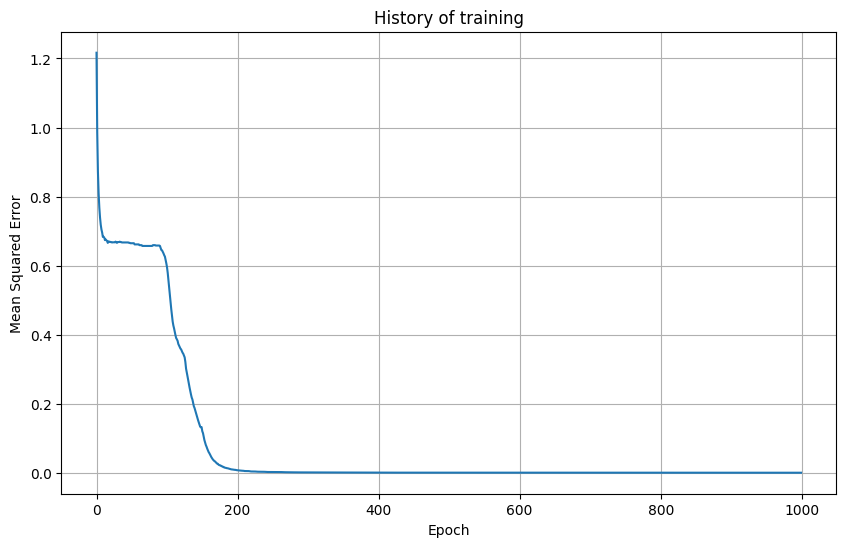

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(bpnn.history)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('History of training')
plt.grid(True)
plt.show()

### Usage of diagnosis app

In [5]:
input_data = pd.read_excel('diagnosis_input.xlsx')
input_data.head()
input_set = []
for index, row in input_data.iterrows():
    features = [row['Fever'], row['Cough'], row['Headache'], row['Tiredness'], row['Night Sweat']]
    input_set.append(features)

output_set = []
for net_input in input_set:
    net_output = bpnn.run(net_input)
    output_set.append(net_output)
    print("Input: ", net_input, " Output: ", net_output)
# Create a DataFrame for the output data

header = list(data.columns)
output_data = pd.DataFrame(columns=header)

for i in range(len(input_set)):
    row = input_set[i] + output_set[i]
    output_data.loc[i] = row

output_data.to_excel('diagnosis_output.xlsx', index=False)
output_data

Input:  [0.0, 0.5, 0.0, 0.0, 0.0]  Output:  [0.0, 0.01, 0.99]
Input:  [1.0, 1.0, 1.0, 1.0, 0.0]  Output:  [0.01, 0.99, 0.01]
Input:  [0.5, 1.0, 0.0, 1.0, 1.0]  Output:  [0.99, 0.01, 0.0]
Input:  [1.0, 0.5, 0.5, 0.5, 0.0]  Output:  [0.01, 0.99, 0.01]
Input:  [0.0, 0.5, 0.0, 0.2, 0.0]  Output:  [0.0, 0.01, 0.99]


,Fever,Cough,Headache,Tiredness,Night Sweat,Pneumonia,Flu,Cold
0,0.0,0.5,0.0,0.0,0.0,0.00,0.01,0.99
1,1.0,1.0,1.0,1.0,0.0,0.01,0.99,0.01
2,0.5,1.0,0.0,1.0,1.0,0.99,0.01,0.00
3,1.0,0.5,0.5,0.5,0.0,0.01,0.99,0.01
4,0.0,0.5,0.0,0.2,0.0,0.00,0.01,0.99


### Mean squared error for the training set

In [6]:
error = bpnn.calculate_mean_squared_error()
error

0.00023333333333333352

### Max error of the single output neuron for a training net

In [7]:
max = bpnn.calculate_max_error()
max

0.010000000000000009